## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_study_df.describe()


In [2]:
# Checking the number of mice.
combined_study_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. .groupby('')
dup_mouse_df = combined_study_df[combined_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dup_mouse_df["Mouse ID"].unique()




array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_g989 = combined_study_df.loc[combined_study_df["Mouse ID"]=="g989"]
dup_g989


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mouse_df = combined_study_df.loc[combined_study_df["Mouse ID"]!="g989"]
unique_mouse_df


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_df['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_vol_df = unique_mouse_df.groupby(["Drug Regimen"])

tumor_mean = tumor_vol_df["Tumor Volume (mm3)"].mean()
tumor_median = tumor_vol_df["Tumor Volume (mm3)"].median()
tumor_var = tumor_vol_df["Tumor Volume (mm3)"].var()
tumor_stdev = tumor_vol_df["Tumor Volume (mm3)"].std()
tumor_SEM = tumor_vol_df["Tumor Volume (mm3)"].sem()

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor_Vol_Analysis = pd.DataFrame({
    "Tumor Mean":tumor_mean,
    "Tumor Median":tumor_median,
    "Tumor Variance":tumor_var,
    "Tumor StdDev":tumor_stdev,
    "Tumor SEM":tumor_SEM})

Tumor_Vol_Analysis["Tumor Mean"]=Tumor_Vol_Analysis["Tumor Mean"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor Median"]=Tumor_Vol_Analysis["Tumor Median"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor Variance"]=Tumor_Vol_Analysis["Tumor Variance"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor StdDev"]=Tumor_Vol_Analysis["Tumor StdDev"].map("{:,.2f}".format)
Tumor_Vol_Analysis["Tumor SEM"]=Tumor_Vol_Analysis["Tumor SEM"].map("{:,.2f}".format)
Tumor_Vol_Analysis



Tumor Mean Tumor Median Tumor Variance Tumor StdDev Tumor SEM
Drug Regimen                                                              
Capomulin         40.68        41.56          24.95         4.99      0.33
Ceftamin          52.59        51.78          39.29         6.27      0.47
Infubinol         52.88        51.82          43.13         6.57      0.49
Ketapril          55.24        53.70          68.55         8.28      0.60
Naftisol          54.33        52.51          66.17         8.13      0.60
Placebo           54.03        52.29          61.17         7.82      0.58
Propriva          52.32        50.45          43.85         6.62      0.54
Ramicane          40.22        40.67          23.49         4.85      0.32
Stelasyn          54.23        52.43          59.45         7.71      0.57
Zoniferol         53.24        51.82          48.53         6.97      0.52

In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregated = unique_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})

aggregated

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

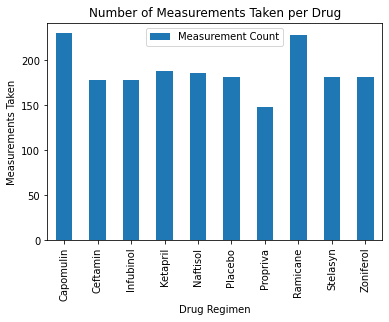

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = unique_mouse_df.groupby(["Drug Regimen"])
count_measurements = measurements_df['Weight (g)'].count()

drug_and_measurement_df = pd.DataFrame({
    "Measurement Count":count_measurements})

drug_and_measurement_df.head()

#Create bar chart
drug_and_measurement_df.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")
plt.legend(loc="best")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Measurements Taken')

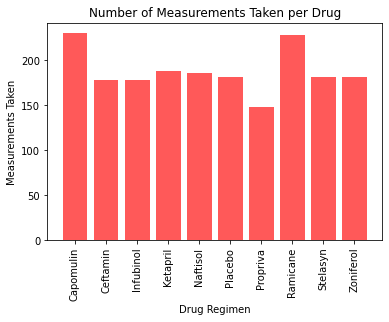

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_and_measurement_df
plt.bar(drug_and_measurement_df.index.values, drug_and_measurement_df["Measurement Count"], color='r', alpha=0.65, align="center")
plt.xticks(rotation=90)

plt.title("Number of Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")


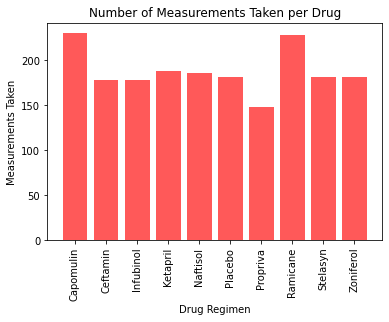

<Figure size 432x288 with 0 Axes>

In [16]:
#Alternate version of the bart chart code.  Albeit less optimal due to the hardcoding of the labels. 
x_axis = np.arange(len(drug_and_measurement_df))
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
          "Ramicane", "Stelasyn", "Zoniferol"]

tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_and_measurement_df["Measurement Count"], color='r', alpha=0.65, align="center")

plt.xticks(tick_locations, labels, rotation=90 )

plt.title("Number of Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")

plt.show()
plt.tight_layout()

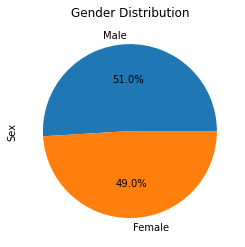

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = unique_mouse_df["Sex"].value_counts()
gender_count
        
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

<ipython-input-18-cb24c0882ddb>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct="%1.1f%%")


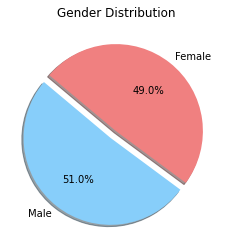

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [gender_count]
colors = ["lightskyblue", "lightcoral"]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct="%1.1f%%")

plt.title("Gender Distribution")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = unique_mouse_df.groupby(["Mouse ID"]).max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Combined_Time_df = timepoint_df[["Mouse ID", "Timepoint"]].merge(unique_mouse_df, on=["Mouse ID", "Timepoint"],how="left")
Combined_Time_df.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_timemax_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    drug_impact = Combined_Time_df[Combined_Time_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    iqr = drug_impact.quantile(.75) - drug_impact.quantile(.25)
    lower_bound = drug_impact.quantile(.25) - (1.5*iqr)
    upper_bound = drug_impact.quantile(.75) + (1.5*iqr)
    
    # add subset
    tumor_timemax_vol.append(drug_impact)
    
    #Determine outliers using upper and lower bounds
    print(f'{treatment} are potential outliers: {drug_impact[(drug_impact<lower_bound)|(drug_impact>upper_bound)]}')
    

Capomulin are potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane are potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol are potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin are potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


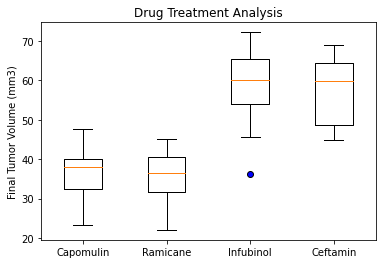

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_timemax_vol, labels=treatments, flierprops={"markerfacecolor":"blue"})
plt.title('Drug Treatment Analysis')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

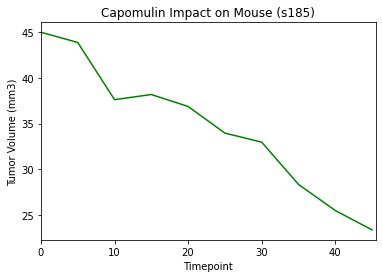

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Filter data to isolate one mouse receiving treatment with Capomulin
capomulin = unique_mouse_df.loc[unique_mouse_df["Drug Regimen"]=="Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]=="s185"]

#x-axis is timepoint & y-axis is tumor volume
x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]

#plot data for mouse s185
plt.plot(x_axis, y_axis, color="green")
plt.title('Capomulin Impact on Mouse (s185)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0, 45.5)

plt.show()
plt.tight_layout()

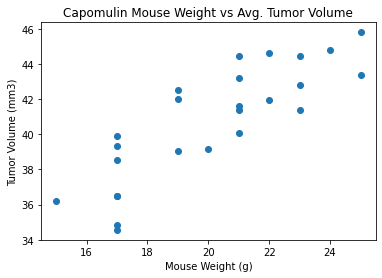

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Filter dataframe for only the Capomulin regimen and apply average
capomulin_group = capomulin.groupby("Mouse ID").mean()

#plot scatterplot for avg tumor volume and weight
volume = capomulin_group["Tumor Volume (mm3)"]
weight = capomulin_group["Weight (g)"]
plt.scatter(weight, volume)
plt.title('Capomulin Mouse Weight vs Avg. Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation coefficient between weight and average tumor volume for Capomulin is 0.84


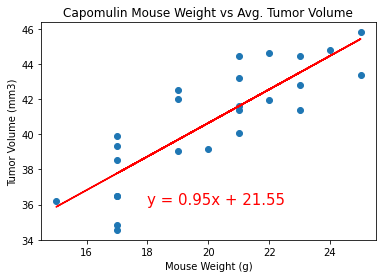

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Find the correlation coefficient
print(f"The correlation coefficient between weight and average tumor volume for Capomulin is {round(st.pearsonr(weight,volume)[0],2)}")

#Perform the linear regression on the scatter plot
volume = capomulin_group["Tumor Volume (mm3)"]
weight = capomulin_group["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, volume)
plt.plot(weight, regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

plt.title('Capomulin Mouse Weight vs Avg. Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
